# Heatmap for energy consumption analysis

### In this analysis, i try to give a descriptive analysis from energy consume in heatmap diagram

### 1. Reading and reviewing the raw data
##### In this section i make a quick look what kind data i have

##### 1.1. Importing all the needed libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("Energyconsumption_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


##### 1.2. Checking the data types and rename column

In [3]:
df.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [4]:
df.rename(columns={
                   df.columns[1]: "MW",
                   }, inplace = True)

In [5]:
df.head(5)

,Datetime,MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


### 2. Data Manipulation

##### After a quick look, i try to changing the data type and making a new column


###### 2.1. Changing data type from Strings to Date Time

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head(5)

,Datetime,MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [7]:
df.dtypes

Datetime    datetime64[ns]
MW                 float64
dtype: object

###### 2.2. Seperating value in hour and date from Datetime column

In [8]:
df['Time'],df['Date']= df['Datetime'].apply(lambda x:x.time()), df['Datetime'].apply(lambda x:x.date())

In [9]:
df.dtypes

Datetime    datetime64[ns]
MW                 float64
Time                object
Date                object
dtype: object

In [10]:
df.head(5)

,Datetime,MW,Time,Date
0,2004-12-31 01:00:00,13478.0,01:00:00,2004-12-31
1,2004-12-31 02:00:00,12865.0,02:00:00,2004-12-31
2,2004-12-31 03:00:00,12577.0,03:00:00,2004-12-31
3,2004-12-31 04:00:00,12517.0,04:00:00,2004-12-31
4,2004-12-31 05:00:00,12670.0,05:00:00,2004-12-31


In [11]:
df.dtypes

Datetime    datetime64[ns]
MW                 float64
Time                object
Date                object
dtype: object

##### 2.3. Checking missing data 

In [12]:
df.isnull().head()

,Datetime,MW,Time,Date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [13]:
df.isnull().sum()

Datetime    0
MW          0
Time        0
Date        0
dtype: int64

### 3. Data Modelling and Vizualization
##### Data is ready, now i can make a data model that suits a heatmap diagram

##### 3.1. Changing the model from data into pivot table

In [14]:
table = pd.pivot_table(df, values='MW', index=['Time'],
                    columns=['Date'])
table

Date,2004-10-01,2004-10-02,2004-10-03,2004-10-04,2004-10-05,2004-10-06,2004-10-07,2004-10-08,2004-10-09,2004-10-10,...,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31,2018-08-01,2018-08-02,2018-08-03
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,NaN,13147.0,12172.0,12351.0,13405.0,13541.0,13249.0,13271.0,13103.0,12096.0,...,14927.0,15027.0,15127.0,13885.0,13017.0,13680.0,14363.0,14424.0,14125.0,14809.0
01:00:00,12379.0,12260.0,11443.0,11817.0,12532.0,12764.0,12484.0,12468.0,12214.0,11269.0,...,13990.0,13865.0,14057.0,12886.0,12177.0,12927.0,13501.0,13538.0,13286.0,NaN
02:00:00,11935.0,11672.0,10807.0,11408.0,12126.0,12347.0,12054.0,12046.0,11597.0,10782.0,...,13394.0,13179.0,13320.0,12167.0,11523.0,12397.0,12787.0,12903.0,12587.0,NaN
03:00:00,11692.0,11352.0,10600.0,11261.0,11926.0,12192.0,11745.0,11749.0,11273.0,10580.0,...,12956.0,12668.0,12846.0,11765.0,11124.0,12096.0,12382.0,12506.0,12296.0,NaN
04:00:00,11597.0,11177.0,10438.0,11247.0,11914.0,12164.0,11757.0,11784.0,11119.0,10446.0,...,12717.0,12411.0,12512.0,11518.0,10862.0,11938.0,12275.0,12206.0,12059.0,NaN
05:00:00,11681.0,11142.0,10430.0,11414.0,12010.0,12356.0,12041.0,11919.0,11064.0,10426.0,...,12697.0,12392.0,12533.0,11354.0,10649.0,12109.0,12498.0,12295.0,12224.0,NaN
06:00:00,12280.0,11331.0,10509.0,12283.0,12770.0,13160.0,12823.0,12610.0,11356.0,10468.0,...,13216.0,12860.0,12956.0,11571.0,10748.0,12559.0,12926.0,12714.0,12781.0,NaN
07:00:00,13692.0,11866.0,10795.0,13862.0,14393.0,14677.0,14394.0,14209.0,11733.0,10862.0,...,13972.0,13465.0,13557.0,11619.0,10812.0,13474.0,13871.0,13512.0,13661.0,NaN
08:00:00,14618.0,12387.0,11288.0,14864.0,15444.0,15685.0,15463.0,15239.0,12495.0,11250.0,...,14751.0,14166.0,14244.0,12022.0,10966.0,14033.0,14554.0,14139.0,14326.0,NaN


##### 3.2. Making a data visualization in heatmap diagram

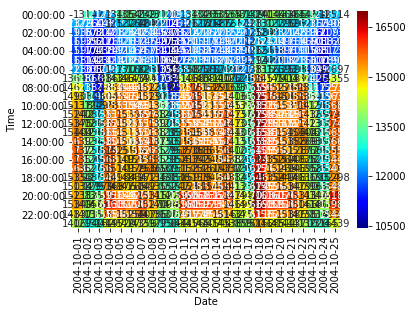

In [15]:
Carpetplot = sns.heatmap(table.iloc[:,:25],annot = True, cmap = "jet", fmt='.0f')
plt.show()
plt.rcParams["figure.figsize"] = (20,5)